In [19]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
# Тренировочные данные после преобразования "Heatmap"
train_Data_pre = pd.read_csv('DataSet.csv', encoding='latin-1')
#train_Data_pre = pd.read_csv('Data_Set.csv', encoding='latin-1')
train_Data_pre.head()

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi,Outcome
0,-0.000044,-0.000178,-8.530000e-07,0.000044,0.000179,0.000006,-0.000018,0.000004,-0.000034,0.000018,-0.000004,0.000036,0
1,-0.110163,-0.096615,-1.051294e-01,-0.064434,-0.167006,-0.087618,-0.098391,-0.106327,-0.107474,0.851331,0.363000,-0.067917,1
2,-0.095329,-0.138420,-1.092485e-01,-0.008426,-0.113839,-0.054063,-0.044755,-0.066786,-0.104042,0.256113,0.125095,-0.032683,1
3,-0.111484,-0.102172,-1.075137e-01,-0.034207,-0.193541,-0.075497,-0.074116,-0.095515,-0.109110,0.786031,0.358000,-0.048139,1
4,-0.001287,-0.076536,-2.901535e-02,0.176885,0.006595,0.141945,0.105398,0.069049,0.007679,0.288711,0.237738,0.121593,1


In [21]:
train_Data = train_Data_pre[['x','d_x','fi','d_fi']]
#train_Data = train_Data_pre[['x','y','z','d_x','d_y','d_z','fi','thetta','psi','d_fi','d_thetta','d_psi']]
train_Data.head()

,x,d_x,fi,d_fi
0,-0.000044,0.000044,-0.000018,0.000018
1,-0.110163,-0.064434,-0.098391,0.851331
2,-0.095329,-0.008426,-0.044755,0.256113
3,-0.111484,-0.034207,-0.074116,0.786031
4,-0.001287,0.176885,0.105398,0.288711


In [22]:
"""
# Нормализация данных
from sklearn import preprocessing
normalization = preprocessing.StandardScaler()
normalization.fit(train_Data)
train_Data = normalization.transform(train_Data)
train_Data = pd.DataFrame(data = train_Data)  # Перевод из numpy ---> pandas
train_Data
"""


'\n# Нормализация данных\nfrom sklearn import preprocessing\nnormalization = preprocessing.StandardScaler()\nnormalization.fit(train_Data)\ntrain_Data = normalization.transform(train_Data)\ntrain_Data = pd.DataFrame(data = train_Data)  # Перевод из numpy ---> pandas\ntrain_Data\n'

In [23]:
# Задание параметров модели k-means
kmeans = KMeans(algorithm = 'auto', n_clusters = 2, init = 'k-means++', 
                n_init = 10, max_iter = 1000, tol = 0.0001, verbose = 0, random_state = 42).fit(train_Data)

In [24]:
# Назначеные кластеры (классы) для тренировочных данных
labels_train = kmeans.labels_
labels_train

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# Координаты вычисленных центроидов
kmeans.cluster_centers_

array([[-5.77516074e-02,  3.21713506e-01,  9.14375214e-04,
         3.02363307e-01],
       [-1.34850125e-01, -1.94825348e+01, -1.50118018e-01,
        -2.01337881e+01]])

In [26]:
# Расчет коэффициента Силуета (Silhouette coefficient), который характеризуюет степень разделенности кластеров относительно друг друга
from sklearn.metrics import silhouette_score
Sil_score = silhouette_score(train_Data, labels_train)
Sil_score

0.9075581177957187

In [27]:
len(train_Data_pre)

7505

In [28]:
# from model on train_data
i = 0
n = 0
number_labels_zero = [i for j in labels_train if j == 0]
model_labels_zero = len(number_labels_zero)
number_labels_one = [n for m in labels_train if m == 1]
model_labels_one = len(number_labels_one)

# from train_data (truth)
i = 0
n = 0
number_labels_zero = [i for j in train_Data_pre['Outcome'] if j == 0]
target_labels_zero = len(number_labels_zero)
number_labels_one = [n for m in train_Data_pre['Outcome'] if m == 1]
target_labels_one = len(number_labels_one)

print('Number of Zeros is appointed by K-means: ', model_labels_zero,
      'Number of Zeros is appointed by me: ', target_labels_zero, '\n',
      'Number of units is appointed by K-means: ', model_labels_one,
      'Number of units is appointed by me: ', target_labels_one)

Number of Zeros is appointed by K-means:  7409 Number of Zeros is appointed by me:  1501 
 Number of units is appointed by K-means:  96 Number of units is appointed by me:  6004


In [29]:
K = range(1,12)
models = [KMeans(algorithm = 'auto', n_clusters = cluster, init = 'k-means++', 
                n_init = 100, max_iter = 1000, tol = 0.00001, verbose = 0, random_state = 42).fit(train_Data) for cluster in K]
sum_dist = [model.inertia_ for model in models]

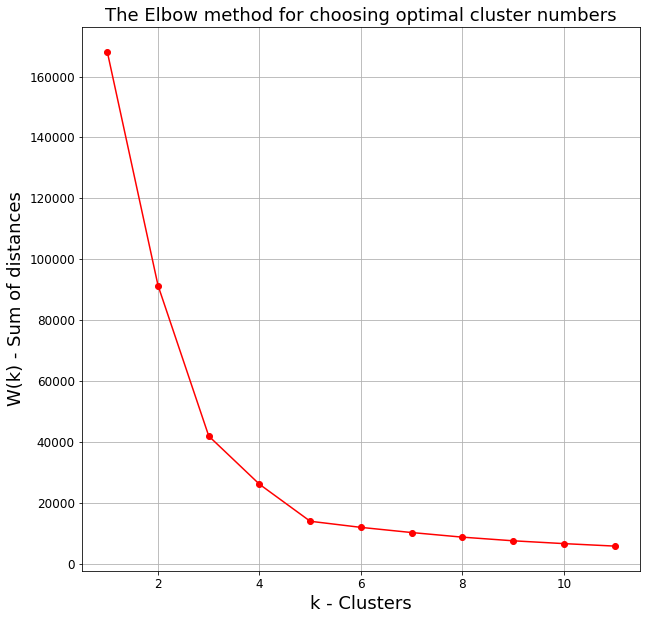

In [30]:
# График зависимости средней кластерной суммы расстояний от числа кластеров (Elbow method)
plt.subplots(figsize = (10,10))
plt.title('The Elbow method for choosing optimal cluster numbers', fontsize = 18)
plt.xlabel('k - Clusters', fontsize = 18)
plt.ylabel('W(k) - Sum of distances', fontsize = 18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.grid() 
plt.plot(K, sum_dist, marker = 'o', color ='r') 